<a href="https://colab.research.google.com/github/KOMBOU12/Marius/blob/main/Projet_Signature.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import torch
print(torch.__version__)

1.11.0+cu102


In [4]:
!pip uninstall -y torch torchvision torchaudio

Found existing installation: torch 1.11.0
Uninstalling torch-1.11.0:
  Successfully uninstalled torch-1.11.0
Found existing installation: torchvision 0.12.0
Uninstalling torchvision-0.12.0:
  Successfully uninstalled torchvision-0.12.0
Found existing installation: torchaudio 0.11.0
Uninstalling torchaudio-0.11.0:
  Successfully uninstalled torchaudio-0.11.0


In [5]:
!pip install torch==1.11.0 torchvision==0.12.0 torchaudio==0.11.0

  Using cached torch-1.11.0-cp310-cp310-manylinux1_x86_64.whl.metadata (24 kB)
  Using cached torchvision-0.12.0-cp310-cp310-manylinux1_x86_64.whl.metadata (10 kB)
  Using cached torchaudio-0.11.0-cp310-cp310-manylinux1_x86_64.whl.metadata (1.0 kB)
Using cached torch-1.11.0-cp310-cp310-manylinux1_x86_64.whl (750.6 MB)
Using cached torchvision-0.12.0-cp310-cp310-manylinux1_x86_64.whl (21.0 MB)
Using cached torchaudio-0.11.0-cp310-cp310-manylinux1_x86_64.whl (2.9 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
peft 0.13.2 requires torch>=1.13.0, but you have torch 1.11.0 which is incompatible.


In [6]:
!git clone https://github.com/patrick-kidger/signatory.git

fatal: destination path 'signatory' already exists and is not an empty directory.


In [7]:
%cd signatory

/content/signatory


In [8]:
!pip install .

Processing /content/signatory
  Preparing metadata (setup.py) ... done
  Created wheel for signatory: filename=signatory-1.2.7-cp310-cp310-linux_x86_64.whl size=8715152 sha256=0ef37db1a5b4752ebb26111867e4fbe00e2783090d92bac675462a1feb05e9cd
  Stored in directory: /tmp/pip-ephem-wheel-cache-aqdjc_6f/wheels/79/0d/1c/cab9af73e64a9a63126cfa61992adbf82fe7309c1e69c97475
Successfully built signatory
  Attempting uninstall: signatory
    Found existing installation: signatory 1.2.7
    Uninstalling signatory-1.2.7:
      Successfully uninstalled signatory-1.2.7


In [9]:
!pip install iisignature

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import signatory
import iisignature
import torch

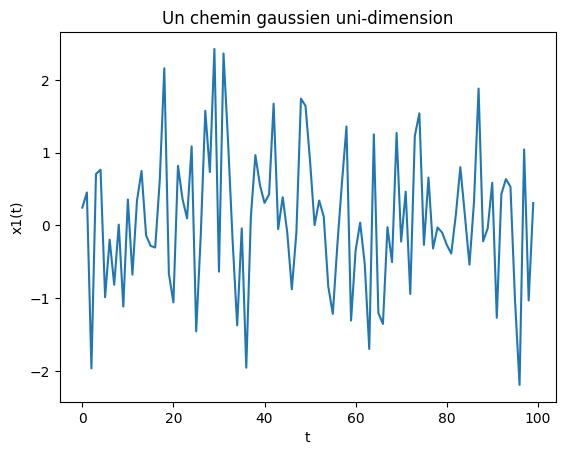

In [25]:
from scipy.interpolate import interp1d

# Génération des données
paths = np.random.normal(size=(100, 100, 2))

# Affichage du premier chemin en 1D
plt.plot(paths[0, :, 0])
plt.title("Un chemin gaussien uni-dimension")
plt.xlabel("t")
plt.ylabel("x1(t)")
plt.show()

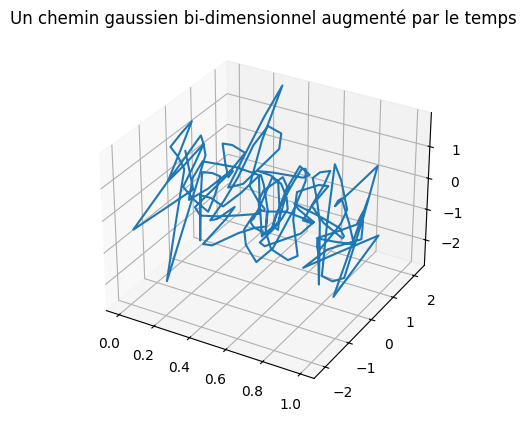

In [30]:
# Initialisation de paths2 avec 200 points par chemin et 3 dimensions (temps + 2 dimensions de chemin)
time = np.linspace(0, 1, 200)  # Un intervalle de temps entre 0 et 1 avec 200 points d'échantillonnage
paths2 = np.zeros((100, 200, 3))
paths2[:, :, 0] = time  # Première dimension est le temps


# Interpolation pour ajuster chaque chemin à 200 points
for i in range(100):  # Pour chaque chemin
    for j in range(2):  # Pour chaque dimension du chemin (x et y)
        # Création de la fonction d'interpolation linéaire
        f = interp1d(np.linspace(0, 1, 100), paths[i, :, j], kind='linear')
        # Application de l'interpolation pour obtenir 200 points
        paths2[i, :, j + 1] = f(time)

# Affichage 3D du premier chemin en 2D
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot(paths2[0, :, 0], paths2[0, :, 1], paths2[0, :, 2])
ax.set_title("Un chemin gaussien bi-dimensionnel augmenté par le temps")
plt.show()

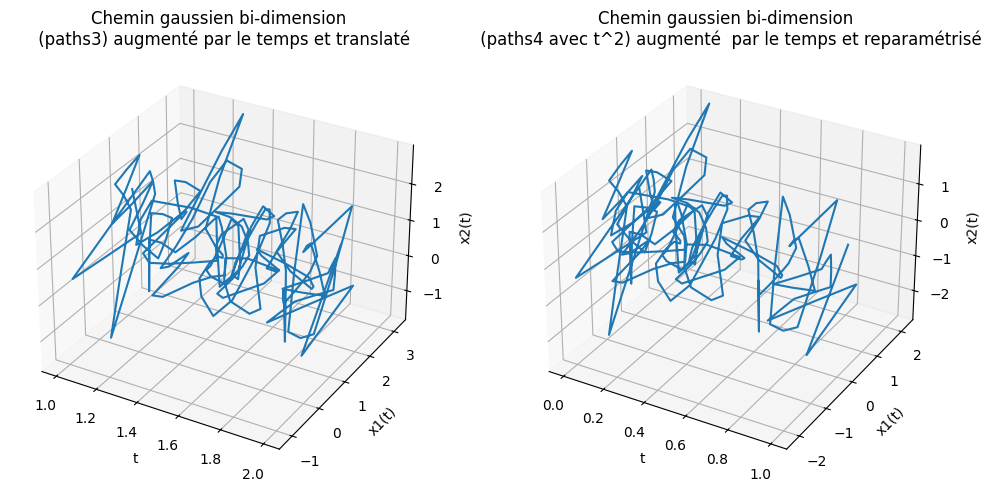

In [31]:
paths3 = paths2 + 1 # translation de paths2


paths4 = np.copy(paths2)
paths4[:, :, 0] = time**2  # Reparametrisation de paths2 : time**2 va bien de [0, 1] dans [0, 1] et est strictement croissante
# On parcourt juste les temps à une vitesse différente

# Visualisation 3D des chemins paths3 et paths4
fig = plt.figure(figsize=(12, 6))

# Tracé pour paths3
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot(paths3[0, :, 0], paths3[0, :, 1], paths3[0, :, 2])
ax1.set_title("Chemin gaussien bi-dimension \n (paths3) augmenté par le temps et translaté")
ax1.set_xlabel("t")
ax1.set_ylabel("x1(t)")
ax1.set_zlabel("x2(t)")

# Tracé pour paths4
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot(paths4[0, :, 0], paths4[0, :, 1], paths4[0, :, 2])
ax2.set_title("Chemin gaussien bi-dimension \n (paths4 avec t^2) augmenté  par le temps et reparamétrisé")
ax2.set_xlabel("t")
ax2.set_ylabel("x1(t)")
ax2.set_zlabel("x2(t)")

plt.show()

In [41]:
path_inverse = np.flip(paths2, axis=1)

In [42]:
depth = 5

Sig = signatory.Signature(depth=depth)

print(signatory.signature_channels(channels = 3, depth = depth))

363


In [40]:
Sig(torch.tensor(paths2))

tensor([[ 1.0000e+00,  1.0000e+00,  6.2317e-02,  ...,  1.6973e-01,
          5.1636e+00,  1.2218e-11],
        [ 1.0000e+00,  1.0000e+00,  9.5824e-01,  ...,  3.9279e-01,
         -8.9347e-01,  3.1192e-04],
        [ 1.0000e+00,  1.0000e+00, -4.7964e-01,  ...,  3.7857e-02,
         -1.7388e+00, -2.5402e-03],
        ...,
        [ 1.0000e+00,  1.0000e+00,  1.3362e+00,  ...,  1.1979e-01,
         -2.4086e+00,  2.7886e-02],
        [ 1.0000e+00,  1.0000e+00,  1.9831e+00,  ...,  1.9335e+00,
         -2.1232e+01, -2.1313e-01],
        [ 1.0000e+00,  1.0000e+00, -2.2723e+00,  ...,  6.9593e-01,
          5.0160e+00,  2.2531e-01]], dtype=torch.float64)

In [43]:
depth = 5
scal = True # Si False, le terme scalaire est exclu de la signature, ce qui signifie que le calcul de la signature commence à partir des interactions des coordonnées du chemin (les termes d'ordre supérieur).
Sig = signatory.Signature(depth = depth, scalar_term = scal)

signature_path = Sig(torch.tensor(paths2))
signature_path_inverse = Sig(torch.tensor(path_inverse.copy()))

#Combinaison des signatures
signatory.signature_combine(signature_path, signature_path_inverse, input_channels = 3, depth = depth, scalar_term = scal)

tensor([[ 1.0000e+00, -6.6613e-16,  3.3307e-16,  ...,  2.5813e-15,
         -1.8652e-14, -1.7702e-14],
        [ 1.0000e+00, -6.6613e-16, -7.7716e-16,  ..., -2.1649e-15,
         -1.4117e-14, -5.1264e-15],
        [ 1.0000e+00, -6.6613e-16,  8.8818e-16,  ...,  2.1233e-15,
          1.5099e-14,  1.2932e-15],
        ...,
        [ 1.0000e+00, -6.6613e-16,  8.8818e-16,  ..., -1.0547e-15,
         -1.7764e-15, -1.3878e-16],
        [ 1.0000e+00, -6.6613e-16,  1.5543e-15,  ..., -1.9498e-15,
          4.4853e-14, -3.5943e-14],
        [ 1.0000e+00, -6.6613e-16, -3.5527e-15,  ...,  2.9143e-16,
          1.5599e-14,  3.7748e-15]], dtype=torch.float64)

In [39]:
sig_path2 = Sig(torch.tensor(paths2))
sig_path3 = Sig(torch.tensor(paths3))
sig_path4 = Sig(torch.tensor(paths4))

#Signatory prend un tenseur PyTorch et RESSORT un tenseur pytorch

print(torch.norm(sig_path2 - sig_path3)) #path2 moins chemin translaté
print(torch.norm(sig_path2 - sig_path4)) #path2 moin chemin dont le temps est au carré

tensor(2.1065e-12, dtype=torch.float64)
tensor(242.9240, dtype=torch.float64)


______________________________________________________________________
# Cours du mercredi 6 novembre

In [44]:
#signatory.signature_combine
#signatory.extract_signature_term

"""
Utiliser signatory( - signatory_combine -> S(X) * S(X reverse)
 - extract_signature_term -> S^k(X)
 - all_words     )

Exercice 1 :
 On  a X = (X^1, X^2) Gaussien,
- Créer X reverse
- Calculer S(X reverse)
- Calculer le produit tensoriel S(X) * S(X reverse)

Exercices 2 :
- Extraire la signature de dégré 2
- Caluler les matrices d'aires de Lévy
"""



"\nUtiliser signatory( - signatory_combine -> S(X) * S(X reverse)\n - extract_signature_term -> S^k(X)  \n - all_words     )\n\nExercice 1 : \n On  a X = (X^1, X^2) Gaussien,\n- Créer X reverse\n- Calculer S(X reverse)\n- Calculer le produit tensoriel S(X) * S(X reverse)\n\nExercices 2 :\n- Extraire la signature de dégré 2\n- Caluler les matrices d'aires de Lévy\n"

In [46]:
sig_deg2 = signatory.extract_signature_term(signature_path, channels = 3, depth = 2, scalar_term= scal) # On souhaite extraire les termes de profondeurs 2 uniquement
sig_deg2.shape #  montre combien de chemins sont dans paths2 et combien de termes de profondeur 2 ont été extrait

torch.Size([100, 9])

 Le résultat torch.Size([100, 9]) est un tenseur et montre que nous avons extrait avec succès les termes de profondeur 2 des signatures pour 100 chemins, chaque chemin étant représenté par 9 termes.

In [35]:
sig_deg2_square = sig_deg2.unflatten(dim=1, sizes = (3,3))
sig_deg2_square.shape

torch.Size([100, 3, 3])

Le nouveau **torch.Size([100, 3, 3])**  sig_deg2_square contient 100 chemins (échantillons), pour chaque chemin, une matrice de 3x3 qui représente les termes de la signature de profondeur 2.

In [36]:
# Aire de Lévy
LA = sig_deg2_square - sig_deg2_square.transpose(dim0= 1, dim1= 2)
LA.shape

torch.Size([100, 3, 3])

**LA.shape :** La forme du résultat est [100, 3, 3], ce qui signifie qu'il y a 100 matrices 3x3, chacune représentant l'aire de Lévy pour un chemin

In [37]:
words = signatory.all_words(channels= 3, depth= 2)

In [38]:
words2 = torch.tensor(words[3:])
words2.unflatten(dim= 0, sizes = (3,3)) #  Réorganise le tenseur words2 de telle sorte que la première dimension soit divisée en une matrice 3x3

tensor([[[0, 0],
         [0, 1],
         [0, 2]],

        [[1, 0],
         [1, 1],
         [1, 2]],

        [[2, 0],
         [2, 1],
         [2, 2]]])

Le résultat est un tenseur 3x3 où chaque élément représente un mot (ou interaction) de profondeur 2.

Chaque mot est une paire $[i,j]$, où $i$ et $j$ indiquent les dimensions impliquées dans l'interaction.